In [1]:
%matplotlib inline

In [2]:
import sqlite3
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import tools

sns.set_style('whitegrid')
mpl.rcParams.update({'font.size': 10})
# init_notebook_mode() # run at the start of every notebook

In [3]:
DB_PATH = "./data/stationdb.sqlite"
WESTOFLON = -104
EASTOFLON = -125

In [4]:
def find_gages(year_low, year_high=2011):
    """Return latlon and ID for USGS gages with checked monthly flows between year_low and year_high."""
    target_stations = [i for i in tools.check_monthly(DB_PATH, year_low, year_high, WESTOFLON, EASTOFLON)]
    conn = sqlite3.connect(DB_PATH)
    sql_query = "SELECT stationid, latgage, longage FROM StationInfo WHERE stationid IN ({seq}) ORDER BY stationid ASC".format(seq = ",".join(["?"] * len(target_stations)))
    latlon = pd.read_sql(sql_query, conn, params = target_stations)
    conn.close()
    return latlon

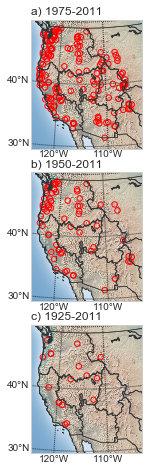

In [5]:
# Try to plot a 3 panel map that shows gage distribution from 1925-2011, 1950-2011, and 1975-2011.
dd = find_gages(1925)
fig = plt.figure(figsize = (2.5, 6.5))
ax = fig.add_subplot(313)
m = Basemap(width = 2000000, height = 2300000, 
            resolution = 'l', projection = 'stere', 
            lat_ts = 40.0, 
            lat_0 = 40.0, lon_0 = -114.0)
# m.drawmapboundary()
m.drawcoastlines(color = "#333333")
# m.drawstates(linewidth = 0.7, color = "#333333")
m.readshapefile('./data/huc250k_regions/huc250k_reg_reproj', 'huc250k', 
                linewidth = 0.7, color = "#333333")
m.drawcountries(color = "#333333")
m.shadedrelief()
parallels = np.arange(0., 81, 10)
m.drawparallels(parallels, labels = [True, False, False, False], color = "#333333")
meridians = np.arange(10., 351., 10)
m.drawmeridians(meridians, labels = [False, False, False, True], color = "#333333")
m.scatter(dd['longage'].as_matrix(), dd['latgage'].as_matrix(), 
          s = 30, lw = 1, marker = 'o', 
          latlon = True, facecolors = "none", edgecolors='r')

ax.set_title('c) 1925-2011', loc = 'left')


dd = find_gages(1950)
ax = fig.add_subplot(312)
m = Basemap(width = 2000000, height = 2300000, 
            resolution = 'l', projection = 'stere', 
            lat_ts = 40.0, 
            lat_0 = 40.0, lon_0 = -114.0)
# m.drawmapboundary()
m.drawcoastlines(color = "#333333")
# m.drawstates(linewidth = 0.7, color = "#333333")
m.readshapefile('./data/huc250k_regions/huc250k_reg_reproj', 'huc250k', 
                linewidth = 0.7, color = "#333333")
m.drawcountries(color = "#333333")
m.shadedrelief()
parallels = np.arange(0., 81, 10)
m.drawparallels(parallels, labels = [True, False, False, False], color = "#333333")
meridians = np.arange(10., 351., 10)
m.drawmeridians(meridians, labels = [False, False, False, True], color = "#333333")
m.scatter(dd['longage'].as_matrix(), dd['latgage'].as_matrix(), 
          s = 30, lw = 1, marker = 'o', 
          latlon = True, facecolors = "none", edgecolors='r')
ax.set_title('b) 1950-2011', loc = 'left')


dd = find_gages(1975)
ax = fig.add_subplot(311)
m = Basemap(width = 2000000, height = 2300000, 
            resolution = 'l', projection = 'stere', 
            lat_ts = 40.0, 
            lat_0 = 40.0, lon_0 = -114.0)
# m.drawmapboundary()
m.drawcoastlines(color = "#333333")
# m.drawstates(linewidth = 0.7, color = "#333333")
m.readshapefile('./data/huc250k_regions/huc250k_reg_reproj', 'huc250k', 
                linewidth = 0.7, color = "#333333")
m.drawcountries(color = "#333333")
m.shadedrelief()
parallels = np.arange(0., 81, 10)
m.drawparallels(parallels, labels = [True, False, False, False], color = "#333333")
meridians = np.arange(10., 351., 10)
m.drawmeridians(meridians, labels = [False, False, False, True], color = "#333333")
m.scatter(dd['longage'].as_matrix(), dd['latgage'].as_matrix(), 
          s = 30, lw = 1, marker = 'o', 
          latlon = True, facecolors = "none", edgecolors='r')
ax.set_title('a) 1975-2011', loc = 'left')
fig.tight_layout()
plt.savefig("./plots/s3.eps")

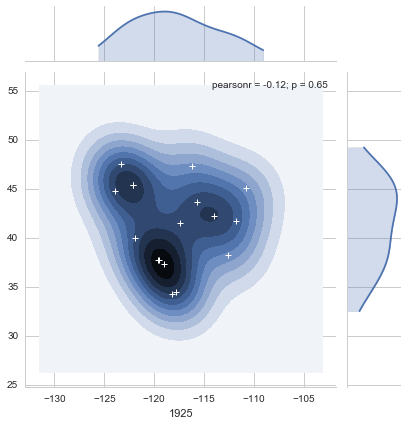

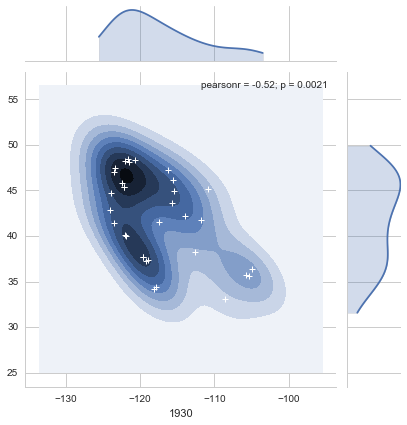

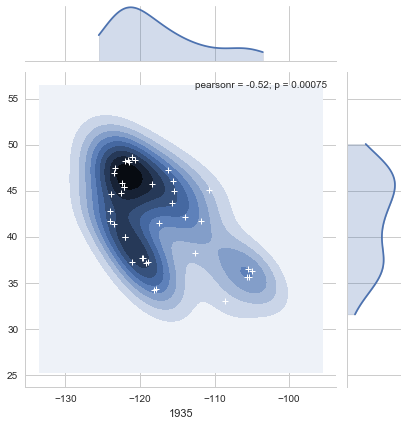

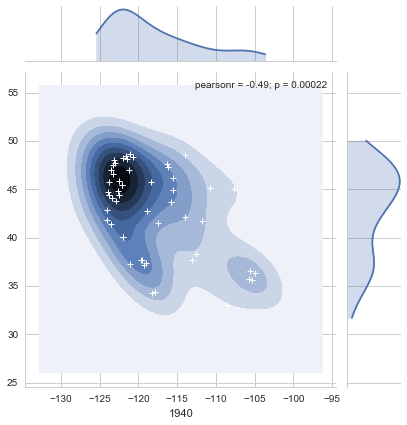

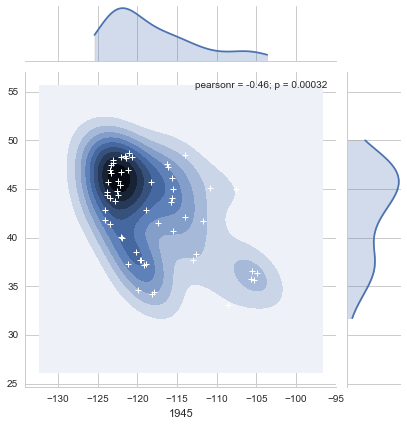

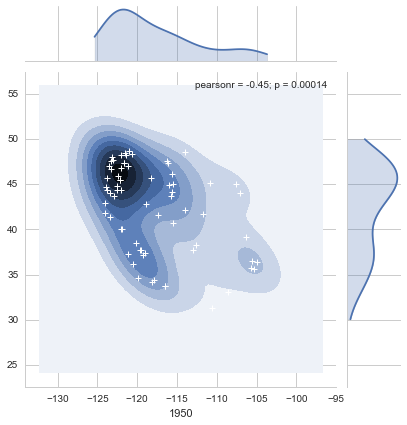

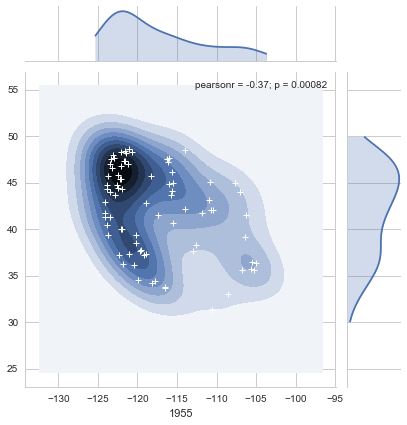

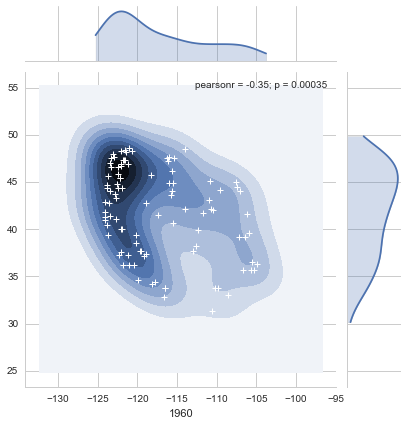

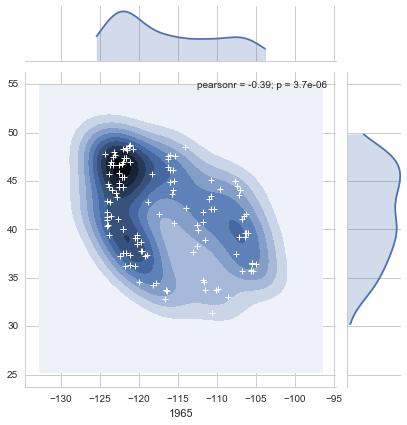

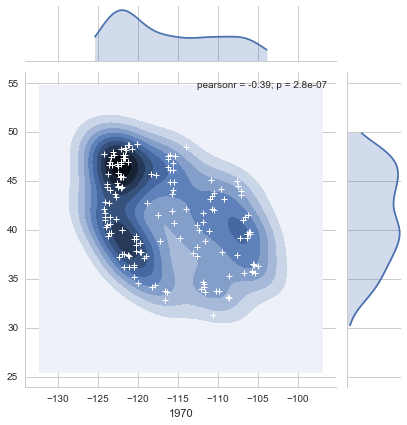

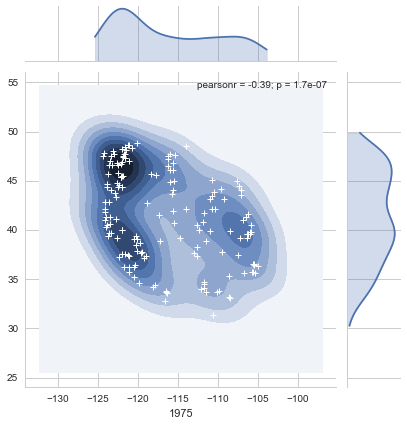

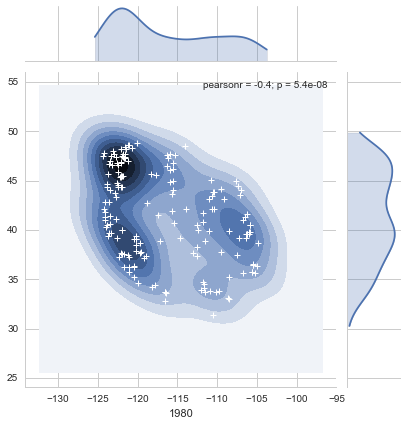

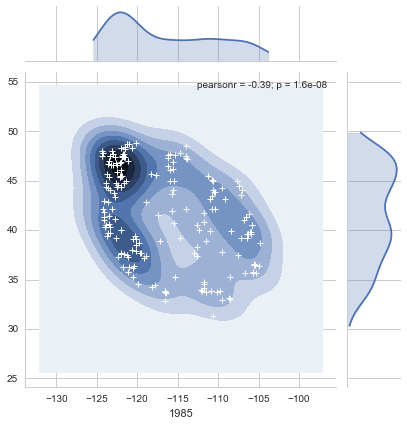

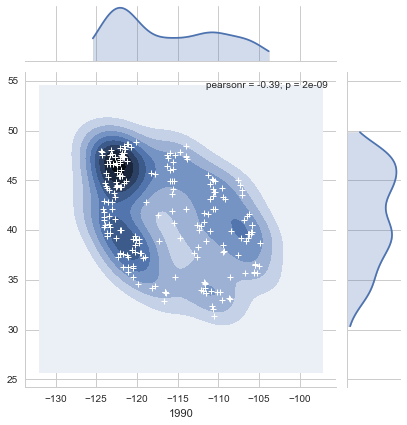

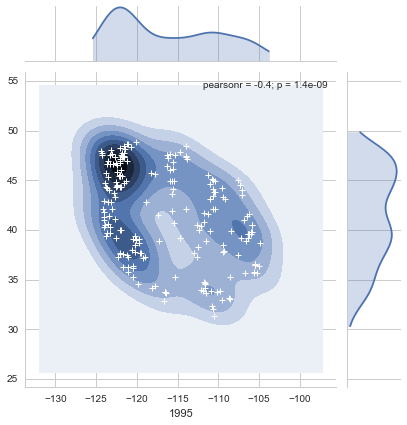

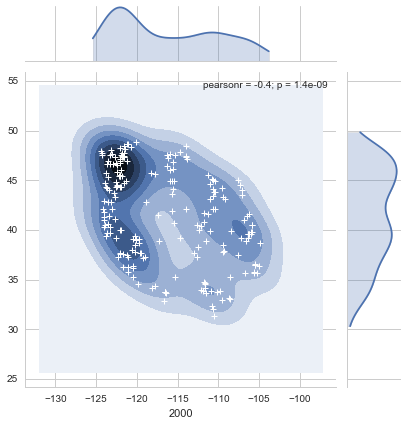

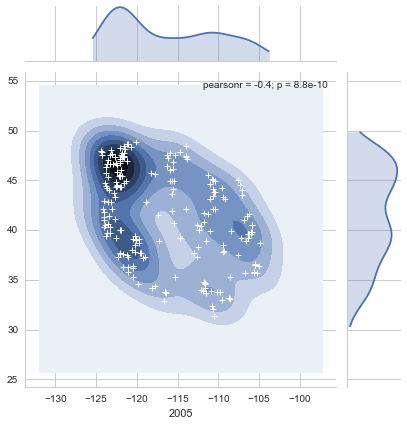

In [6]:
for yr in range(1920, 2010, 5):
    dd = find_gages(yr)
    if len(dd) >= 10:
        g = sns.jointplot(x = dd['longage'], y = dd['latgage'], kind = 'kde')
        g.plot_joint(plt.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
        g.set_axis_labels(yr)
        plt.show()